<a href="https://colab.research.google.com/github/lucasmeirellesmachado/CDIA-Estatistica_II/blob/main/Atividade_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
#Importando a base de dados
base = pd.read_csv('https://raw.githubusercontent.com/lucasmeirellesmachado/CDIA-Estatistica_II/refs/heads/main/Nao%20comparecimento.csv', sep=';', decimal=',')

In [100]:
pd.options.display.max_columns = None
base.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [101]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


### Organização do banco de dados para análise exploratória



In [174]:
# Convertendo para o formato datetime da coluna "ScheduledDay"
base['ScheduledDay'] = pd.to_datetime(base['ScheduledDay'])

# Removendo a parte do horário (ficando apenas com a data)
base['Data agendamento'] = base['ScheduledDay'].dt.date

In [175]:
# Convertendo para o formato datetime da coluna "AppointmentDay"
base['AppointmentDay'] = pd.to_datetime(base['AppointmentDay'])

# Removendo a parte do horário (ficando apenas com a data)
base['Data consulta'] = base['AppointmentDay'].dt.date

In [176]:
base = base.drop(['PatientId', 'AppointmentID'], axis=1)

In [177]:
# Substituindo os valores 1 por 'Sim' e 0 por 'Não' em várias colunas para realizar análise exploratória
base[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No-show']] = base[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No-show']].replace({1: 'Sim', 0: 'Não'})

In [178]:
# Substituindo as letras F por 'Feminino' e M por 'Masculino' na coluna "Gender" para realizar análise exploratória
base[['Gender']] = base[['Gender']].replace({'F': 'Feminino', 'M': 'Masculino'})

### Análise exploratória univariada

In [107]:
#Média e dispersão da idade
base['Age'].describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


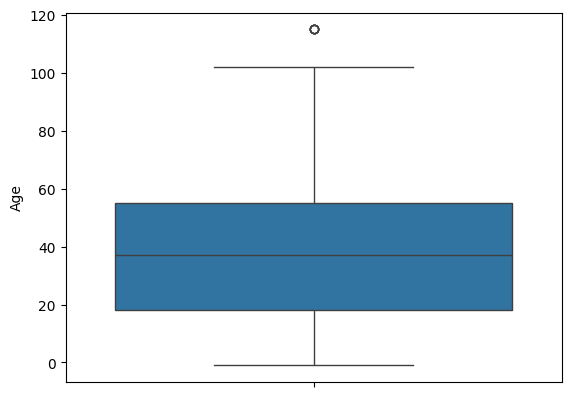

In [108]:
# Visualização gráfica da dispersão da idade
sns.boxplot(y = 'Age', data = base)
plt.xticks(rotation=90)
plt.show()

In [109]:
# Proporção de atendimentos por bairro
pd.set_option('display.max_rows', None)
base['Neighbourhood'].value_counts(normalize=True)*100

,proportion
Neighbourhood,
JARDIM CAMBURI,6.982004
MARIA ORTIZ,5.252110
RESISTÊNCIA,4.008975
JARDIM DA PENHA,3.507740
ITARARÉ,3.179314
CENTRO,3.016458
TABUAZEIRO,2.833697
SANTA MARTHA,2.832792
JESUS DE NAZARETH,2.581270


In [110]:
# Proporção de atendimentos por gênero
base['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
Feminino,64.997693
Masculino,35.002307


In [111]:
# Proporção de atendimentos por pacientes hipertensos
base['Hipertension'].value_counts(normalize=True)*100

,proportion
Hipertension,
Não,80.275408
Sim,19.724592


In [112]:
# Proporção de atendimentos por pacientes diabéticos
base['Diabetes'].value_counts(normalize=True)*100

,proportion
Diabetes,
Não,92.813521
Sim,7.186479


In [113]:
# Proporção de atendimentos por pacientes alcoólatras
base['Alcoholism'].value_counts(normalize=True)*100

,proportion
Alcoholism,
Não,96.960019
Sim,3.039981


In [114]:
# Proporção de recebimento de SMS
base['SMS_received'].value_counts(normalize=True)*100

,proportion
SMS_received,
Não,67.897437
Sim,32.102563


In [115]:
# Proporção de faltantes
base['No-show'].value_counts(normalize=True)*100

,proportion
No-show,
Não,79.806744
Sim,20.193256


In [184]:
# Calcular a diferença entre o dia da consulta com o dia de agendamento

# Certificando-se de que ambas as colunas são do tipo datetime
base['Data consulta'] = pd.to_datetime(base['Data consulta'])
base['Data agendamento'] = pd.to_datetime(base['Data agendamento'])

# Calculando a diferença em dias
base['diferenca_dias'] = (base['Data consulta'] - base['Data agendamento']).dt.days

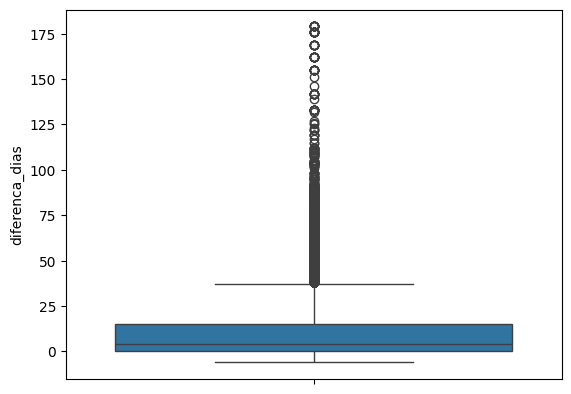

In [185]:
# Visualização gráfica da dispersão do período entre agendamento e realização do atendimento
sns.boxplot(y = 'diferenca_dias', data = base)
plt.xticks(rotation=90)
plt.show()

In [118]:
base['diferenca_dias'].describe()

,diferenca_dias
count,110527.000000
mean,10.183702
std,15.254996
min,-6.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


### Análise exploratória de dados multivariados

In [119]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Gender            110527 non-null  object             
 1   ScheduledDay      110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay    110527 non-null  datetime64[ns, UTC]
 3   Age               110527 non-null  int64              
 4   Neighbourhood     110527 non-null  object             
 5   Scholarship       110527 non-null  object             
 6   Hipertension      110527 non-null  object             
 7   Diabetes          110527 non-null  object             
 8   Alcoholism        110527 non-null  object             
 9   Handcap           110527 non-null  int64              
 10  SMS_received      110527 non-null  object             
 11  No-show           110527 non-null  object             
 12  Data agendamento  110527 non-null  datetime6

In [129]:
# Proporção de pacientes que faltaram nos atendimentos, por gênero

# Contagem por grupo
prop_gen = base.groupby(['Gender', 'No-show']).agg({
    'Gender': 'count'
}).rename(columns={'Gender': 'count'})

# Normalizando por grupo (proporção dentro de cada grupo de 'Gender')
prop_gen['proporcao'] = prop_gen.groupby(level=0)['count'].transform(lambda x: x / x.sum() * 100)

In [130]:
prop_gen

count  proporcao
Gender    No-show                  
Feminino  Não      57246  79.685412
          Sim      14594  20.314588
Masculino Não      30962  80.032052
          Sim       7725  19.967948

In [133]:
# Proporção de pacientes hipertensos que faltaram nos atendimentos

# Contagem por grupo
prop_hiper = base.groupby(['Hipertension', 'No-show']).agg({
    'Hipertension': 'count'
}).rename(columns={'Hipertension': 'count'})

# Normalizando por grupo (proporção dentro de cada grupo de 'Hipertension')
prop_hiper['proporcao'] = prop_hiper.groupby(level=0)['count'].transform(lambda x: x / x.sum() * 100)

In [134]:
prop_hiper

count  proporcao
Hipertension No-show                  
Não          Não      70179  79.096319
             Sim      18547  20.903681
Sim          Não      18029  82.698041
             Sim       3772  17.301959

In [135]:
# Proporção de pacientes diabéticos que faltaram nos atendimentos

# Contagem por grupo
prop_diab = base.groupby(['Diabetes', 'No-show']).agg({
    'Diabetes': 'count'
}).rename(columns={'Diabetes': 'count'})

# Normalizando por grupo (proporção dentro de cada grupo de 'Diabetes')
prop_diab['proporcao'] = prop_diab.groupby(level=0)['count'].transform(lambda x: x / x.sum() * 100)

In [136]:
prop_diab

count  proporcao
Diabetes No-show                  
Não      Não      81695  79.637175
         Sim      20889  20.362825
Sim      Não       6513  81.996727
         Sim       1430  18.003273

In [141]:
# Proporção de pacientes alcoólatras que faltaram nos atendimentos

# Contagem por grupo
prop_alc = base.groupby(['Alcoholism', 'No-show']).agg({
    'Alcoholism': 'count'
}).rename(columns={'Alcoholism': 'count'})

# Normalizando por grupo (proporção dentro de cada grupo de 'Alcoholism')
prop_alc['proporcao'] = prop_alc.groupby(level=0)['count'].transform(lambda x: x / x.sum() * 100)

In [138]:
prop_alc

count  proporcao
Alcoholism No-show                  
Não        Não      85525  79.805351
           Sim      21642  20.194649
Sim        Não       2683  79.851190
           Sim        677  20.148810

In [142]:
# Proporção de pacientes que faltaram nos atendimentos, por SMS recebido

# Contagem por grupo
prop_SMS = base.groupby(['SMS_received', 'No-show']).agg({
    'SMS_received': 'count'
}).rename(columns={'SMS_received': 'count'})

# Normalizando por grupo (proporção dentro de cada grupo de 'SMS_received')
prop_SMS['proporcao'] = prop_SMS.groupby(level=0)['count'].transform(lambda x: x / x.sum() * 100)

In [143]:
prop_SMS

count  proporcao
SMS_received No-show                  
Não          Não      62510  83.296689
             Sim      12535  16.703311
Sim          Não      25698  72.425455
             Sim       9784  27.574545

In [180]:
# Proporção de pacientes que faltaram nos atendimentos, por bolsa de estudos

# Contagem por grupo
prop_esc = base.groupby(['Scholarship', 'No-show']).agg({
    'Scholarship': 'count'
}).rename(columns={'Scholarship': 'count'})

# Normalizando por grupo (proporção dentro de cada grupo de 'Scholarship')
prop_esc['proporcao'] = prop_esc.groupby(level=0)['count'].transform(lambda x: x / x.sum() * 100)

In [181]:
prop_esc

count  proporcao
Scholarship No-show                  
Não         Não      79925  80.192844
            Sim      19741  19.807156
Sim         Não       8283  76.263696
            Sim       2578  23.736304

### Regressão Logísitica - Modelo estatístico

In [186]:
# Selecionar as variáveis categóricas
var_cat = base.select_dtypes(include='object').columns

In [187]:
var_cat

Index(['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'SMS_received', 'No-show'],
      dtype='object')

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
# Criar um dicionário para armazenar os LabelEncoders
label_encoders = {}

# Aplicar LabelEncoder a cada coluna categórica
for i in var_cat:
    le = LabelEncoder()
    base[i] = le.fit_transform(base[i])
    label_encoders[i] = le

In [200]:
#Criar um dicionário para a visualização desses dados codificados
chave = label_encoders['Hipertension'].classes_
valor = label_encoders['Hipertension'].transform(chave)
dicionario = dict(zip(chave, valor))
print(dicionario)

{'Não': 0, 'Sim': 1}


In [191]:
from sklearn.model_selection import train_test_split

In [196]:
X = base[[
         #'Gender',
         #'Neighbourhood',
         'Scholarship',
         'Hipertension',
         #'Diabetes',
         #'Alcoholism',
         'SMS_received'
         ]]

y = base['No-show']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [198]:
#Carregar biblioteca Statsmodels
import statsmodels.api as sm

# Adiciona a constante (intercepto) para o modelo
X_const = sm.add_constant(X_train)

# Ajustar o modelo de regressão logística
modelo = sm.Logit(y_train, X_const).fit()

Optimization terminated successfully.
         Current function value: 0.494349
         Iterations 6


In [199]:
# Exibir o resumo dos resultados do modelo
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:                No-show   No. Observations:                88421
Model:                          Logit   Df Residuals:                    88417
Method:                           MLE   Df Model:                            3
Date:                Sat, 15 Mar 2025   Pseudo R-squ.:                 0.01815
Time:                        20:03:24   Log-Likelihood:                -43711.
converged:                       True   LL-Null:                       -44519.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5955      0.012   -132.260      0.000      -1.619      -1.572
Scholarship      0.2339      0.027      8.710      0.000       0.181       0.287
Hipertension    -0.2201      0.022     -9.94

In [201]:
import numpy as np

In [202]:
odd_ratios = pd.DataFrame({
    'Variable': modelo.params,
    'Odd Ratio': modelo.params.apply(lambda x: round(np.exp(x),3))
})

In [203]:
odd_ratios.sort_values(by='Odd Ratio', ascending=False)

,Variable,Odd Ratio
SMS_received,0.657993,1.931
Scholarship,0.233949,1.264
Hipertension,-0.220123,0.802
const,-1.595493,0.203


Os Odds Ratios (OR) são usados para interpretar os resultados de modelos logísticos. Eles indicam como a razão de chances (odds) de um evento (no caso, o "no-show") muda em função das variáveis preditoras. Em um modelo logístico, os coeficientes podem ser interpretados de forma mais intuitiva ao se converterem em Odds Ratios.

Se o Odds Ratio for maior que 1, significa que a variável aumenta as chances de ocorrência do evento (neste caso, aumenta as chances de "no-show").
Se o Odds Ratio for menor que 1, significa que a variável diminui as chances de ocorrência do evento.
Se o Odds Ratio for igual a 1, significa que a variável não tem efeito sobre as chances do evento.
Agora vamos interpretar os Odds Ratios para cada variável:

1. SMS_received (Odds Ratio = 1.931)

Coeficiente: 0.657993

Odds Ratio: 1.931

Interpretação: Quando uma pessoa recebe um SMS, as chances de "no-show" aumentam em 93,1% (1.931 vezes). Ou seja, receber uma mensagem de texto aumenta significativamente a probabilidade de não comparecimento. A Odds Ratio superior a 1 (1.931) indica que a variável tem um efeito positivo, ou seja, mais chances de "no-show".

2. Scholarship (Odds Ratio = 1.264)

Coeficiente: 0.233949

Odds Ratio: 1.264

Interpretação: Ter uma bolsa de estudos aumenta as chances de "no-show" em 26,4% (1.264 vezes). A Odds Ratio maior que 1 também indica um efeito positivo na probabilidade de não comparecimento, ou seja, pessoas com bolsa de estudos tendem a faltar mais.

3. Hipertension (Odds Ratio = 0.802)

Coeficiente: -0.220123

Odds Ratio: 0.802

Interpretação: A presença de hipertensão reduz as chances de "no-show" em 19,8% (0.802 vezes). Isso significa que pessoas com hipertensão têm menores chances de faltar, o que é indicado pela Odds Ratio inferior a 1.

4. const (Odds Ratio = 0.203)

Coeficiente: -1.595493

Odds Ratio: 0.203

Interpretação: A constante (interceptação) do modelo tem uma Odds Ratio de 0.203. Isso indica que, quando todas as variáveis preditoras são zero, a probabilidade de "no-show" é bastante baixa. A Odds Ratio menor que 1 sugere que, sem os efeitos das variáveis explicativas, a probabilidade de não comparecimento é reduzida.


### Regressão Logística - Machine Learning

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_log = modelo_log.predict(X_test)